### One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.





Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

Dataset Description

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

Store - the store number

Date - the week of sales

Weekly_Sales -  sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

Holiday Events

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

### Analysis Tasks

Basic Statistics tasks

Which store has maximum sales

Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

Which store/s has good quarterly growth rate in Q3’2012

Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

Provide a monthly and semester view of sales in units and give insights

Statistical Model

For Store 1 – Build  prediction models to forecast demand

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

Change dates into days by creating new variable.

Select the model which gives best accuracy.

In [1]:
import os
os.chdir('A:\DataScience with python\Project4')
os.getcwd()

'A:\\DataScience with python\\Project4'

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime
data = pd.read_csv('Walmart_Store_sales.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
pd.options.display.float_format = "{:.2f}".format

### Which store has maximum sales

In [4]:
data['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [5]:
data.groupby(['Store']).sum().sort_values(by='Weekly_Sales',ascending = False)[:1]

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,
20,301397792.46,10,7929.55,488.72,29892.45,1054.11


In [6]:
total_sales_for_each_store = data.groupby(['Store'])['Weekly_Sales'].sum().sort_values()
total_sales_for_each_store_array = np.array(total_sales_for_each_store) # convert to array for graph plotting

<class 'numpy.float64'>


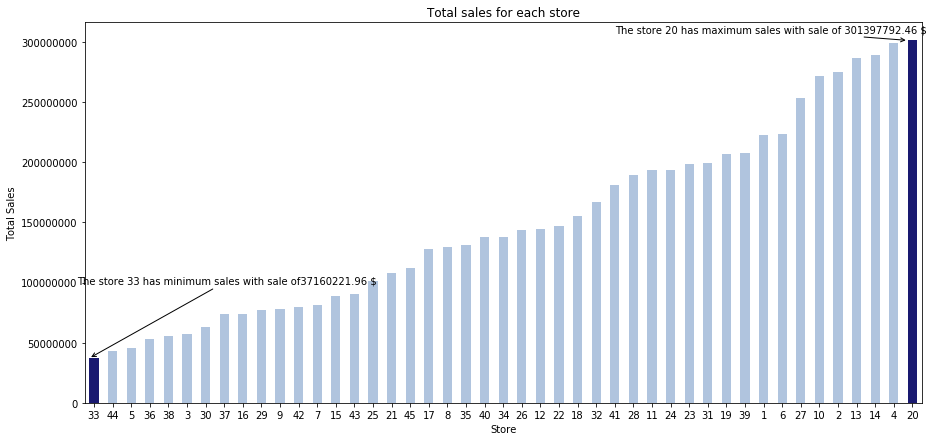

In [7]:
# Assigning a specific color for the stores have the lowest and highest sales
plt.figure(figsize=(15,7))
clrs = ['lightsteelblue' if ((x < max(total_sales_for_each_store_array)) and (x > min(total_sales_for_each_store_array))) else 'midnightblue' for x in total_sales_for_each_store_array]
ax = total_sales_for_each_store.plot(kind='bar',color=clrs);
p = ax.patches[0]
print(type(p.get_height()))
ax.annotate("The store 33 has minimum sales with sale of{0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
xytext=(0.17, 0.32), textcoords='axes fraction',
arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
horizontalalignment='center', verticalalignment='center')

# store have maximum sales
p = ax.patches[44]
ax.annotate("The store 20 has maximum sales with sale of {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
xytext=(0.82, 0.98), textcoords='axes fraction',
arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
horizontalalignment='center', verticalalignment='center')

# plot properties
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales');

## Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [8]:
data_std = pd.DataFrame(data.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False))
data_std.head()

,Weekly_Sales
Store,
14,317569.95
10,302262.06
20,275900.56
4,266201.44
13,265507.00


#### The store has maximum standard deviation is 14 with 317570 $

C:\ProgramData\Anaconda31\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


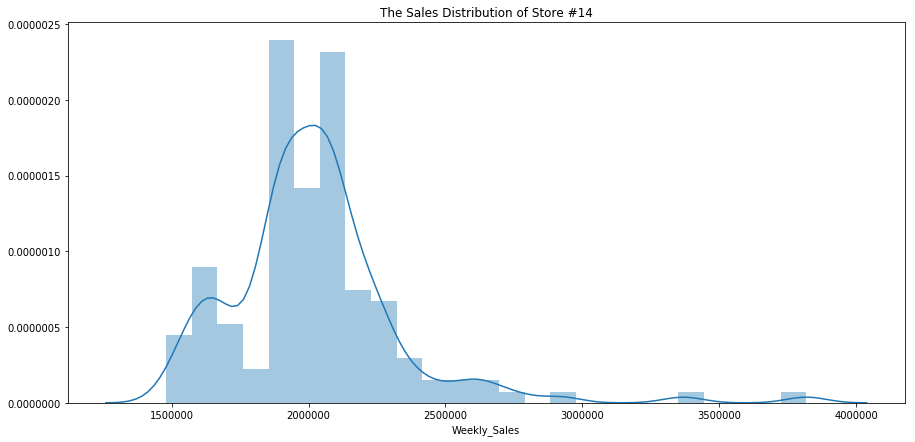

In [9]:
# Distribution of store which has maximum standard deviation
plt.figure(figsize=(15,7))
sns.distplot(data[data['Store'] == data_std.head(1).index[0]]['Weekly_Sales'])
plt.title('The Sales Distribution of Store #'+ str(data_std.head(1).index[0]));

In [10]:
# Coefficient of mean to standard deviation
coef_mean_std = pd.DataFrame(data.groupby('Store')['Weekly_Sales'].mean() / data.groupby('Store')['Weekly_Sales'].std())
coef_mean_std = coef_mean_std.rename(columns={'Weekly_Sales':'Coefficient of mean to standard deviation'})
coef_mean_std.head()

,Coefficient of mean to standard deviation
Store,
1,9.97
2,8.10
3,8.69
4,7.87
5,8.43


Text(0.5, 1.0, 'The Sales Distribution of Store #37')

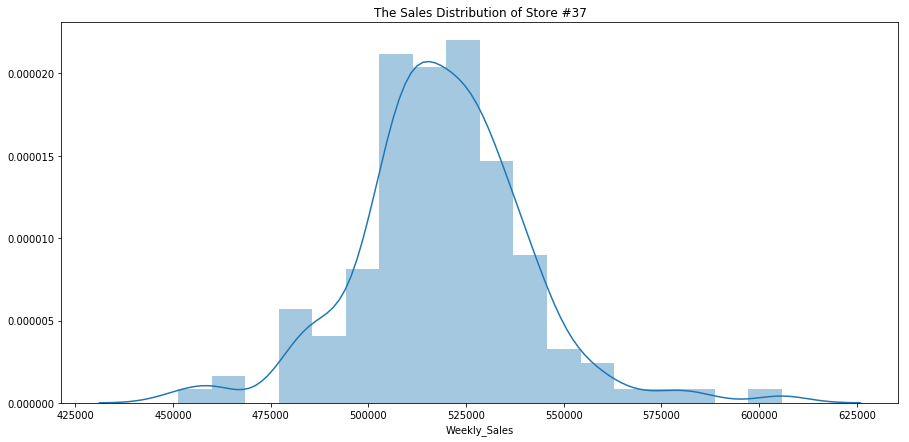

In [11]:
# Distribution of store which has maximum coefficient of mean to standard deviation
coef_mean_std_max = coef_mean_std.sort_values(by='Coefficient of mean to standard deviation')
plt.figure(figsize=(15,7))
sns.distplot(data[data['Store'] == coef_mean_std_max.tail(1).index[0]]['Weekly_Sales'])
plt.title('The Sales Distribution of Store #'+str(coef_mean_std_max.tail(1).index[0]))

## Which store/s has good quarterly growth rate in Q3’2012

In [12]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11


In [13]:
type(data['Date'])

pandas.core.series.Series

In [14]:
data['Date'] = pd.to_datetime(data['Date'])
# Splitting Date and create new columns (Day, Month, and Year)
data["Day"]= pd.DatetimeIndex(data['Date']).day
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Year'] = pd.DatetimeIndex(data['Date']).year
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.57,211.10,8.11,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.55,211.24,8.11,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.62,211.35,8.11,3,5,2010


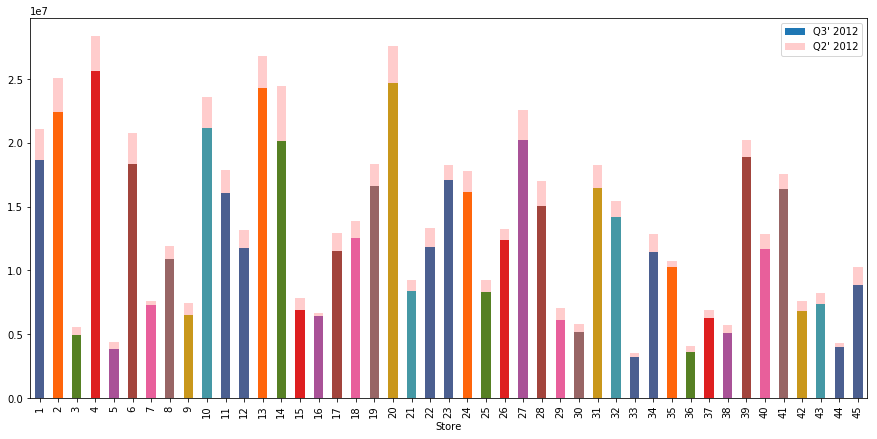

In [15]:
plt.figure(figsize=(15,7))

# Sales for third quarter in 2012
Q3 = data[(data['Date'] >= '2012-07-01') & (data['Date'] <= '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()

# Sales for second quarterly in 2012
Q2 = data[(data['Date'] >= '2012-04-01') & (data['Date'] <= '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()
# Plotting the difference between sales for second and third quarterly
Q2.plot(ax=Q3.plot('bar',legend=True),kind='bar',color='r',alpha=0.2,legend=True);
plt.legend(["Q3' 2012", "Q2' 2012"]);

In [16]:
Q3 = pd.DataFrame(Q3).rename(columns = {'Weekly_Sales':'Quarterly_Sales_Q3'})
Q2 = pd.DataFrame(Q2).rename(columns = {'Weekly_Sales':'Quarterly_Sales_Q2'})
net_quarter_sales = pd.concat([Q3,Q2],sort = True,join = 'inner', axis = 1)
net_quarter_sales['quarterly_growth_rate'] = (net_quarter_sales['Quarterly_Sales_Q3'] - net_quarter_sales['Quarterly_Sales_Q2'] ) / net_quarter_sales['Quarterly_Sales_Q2'] * 100
net_quarter_sales = net_quarter_sales.sort_values('quarterly_growth_rate',ascending = False)
net_quarter_sales.head(1)

,Quarterly_Sales_Q3,Quarterly_Sales_Q2,quarterly_growth_rate
Store,,,
16,6441311.11,6626133.44,-2.79


Quarter growth is negative for all stores, lowest being for store 16

### Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

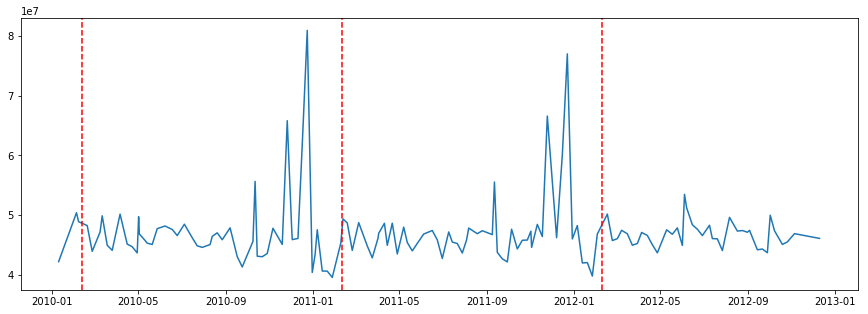

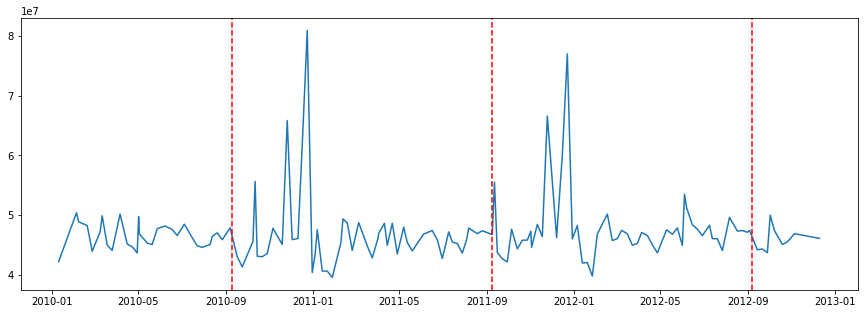

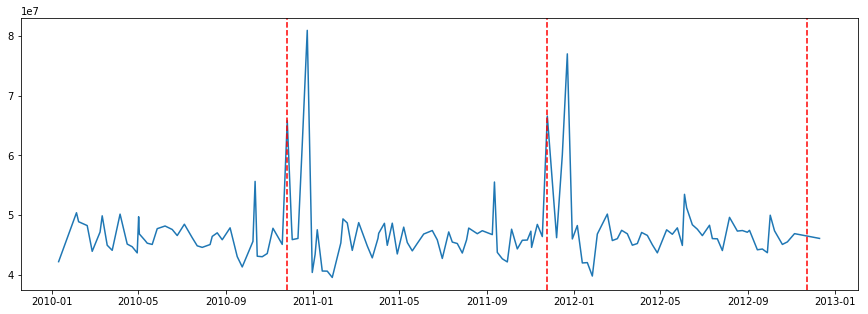

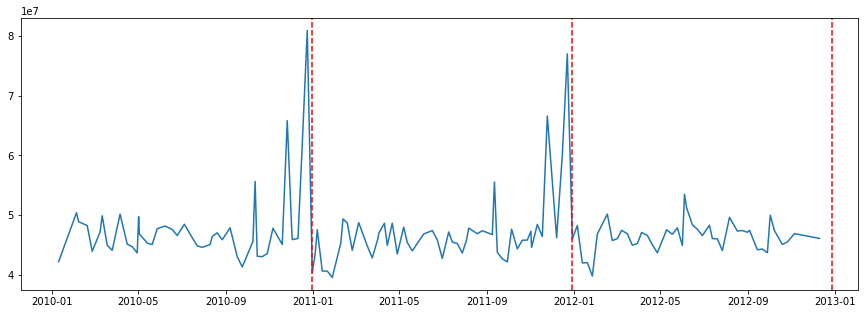

In [150]:
def plot_line(df,holiday_dates,holiday_label):
    fig, ax = plt.subplots(figsize = (15,5))
    ax.plot(df['Date'],df['Weekly_Sales'],label=holiday_label)
    for day in holiday_dates:
        day = datetime.strptime(day, '%d-%m-%Y')
        plt.axvline(x=day, linestyle='--', c='r')
        

    
total_sales = data.groupby('Date')['Weekly_Sales'].sum().reset_index()
mean_sales = data
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day = ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving = ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']
plot_line(total_sales,Super_Bowl,'Super Bowl')
plot_line(total_sales,Labour_Day,'Labour Day')
plot_line(total_sales,Thanksgiving,'Thanksgiving')
plot_line(total_sales,Christmas,'Christmas')

-- The sales increased during thanksgiving. And the sales decreased during christmas.

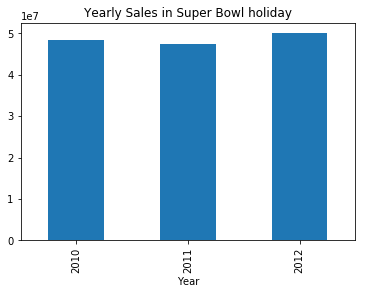

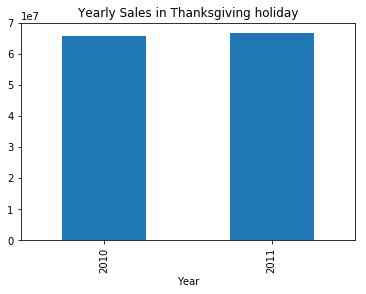

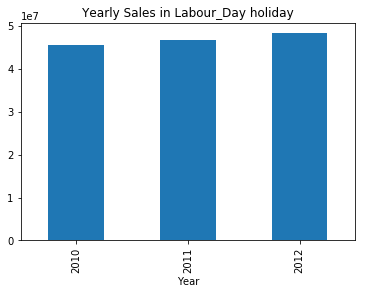

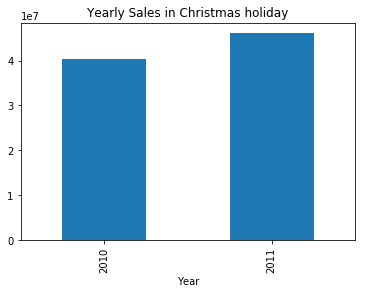

In [147]:
# Yearly Sales in holidays
Super_Bowl_df = pd.DataFrame(data.loc[data.Date.isin(Super_Bowl)].groupby('Year')['Weekly_Sales'].sum())
Thanksgiving_df = pd.DataFrame(data.loc[data.Date.isin(Thanksgiving)].groupby('Year')['Weekly_Sales'].sum())
Labour_Day_df = pd.DataFrame(data.loc[data.Date.isin(Labour_Day)].groupby('Year')['Weekly_Sales'].sum())
Christmas_df = pd.DataFrame(data.loc[data.Date.isin(Christmas)].groupby('Year')['Weekly_Sales'].sum())
Super_Bowl_df.plot(kind='bar',legend=False,title='Yearly Sales in Super Bowl holiday')
Thanksgiving_df.plot(kind='bar',legend=False,title='Yearly Sales in Thanksgiving holiday')
Labour_Day_df.plot(kind='bar',legend=False,title='Yearly Sales in Labour_Day holiday')
Christmas_df.plot(kind='bar',legend=False,title='Yearly Sales in Christmas holiday')

-- The sales increased during thanksgiving. And the sales decreased during christmas.

### Provide a monthly and semester view of sales in units and give insights

In [18]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.57,211.10,8.11,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.55,211.24,8.11,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.62,211.35,8.11,3,5,2010


In [19]:
data['Year'].unique()

array([2010, 2011, 2012], dtype=int64)

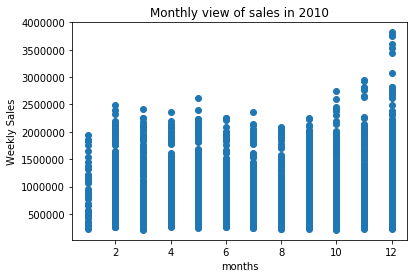

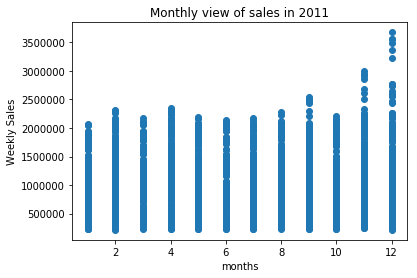

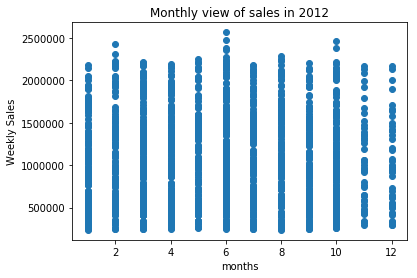

In [20]:
# Monthly view of sales for each years
plt.scatter(data[data.Year==2010]["Month"],data[data.Year==2010]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2010")
plt.show()
plt.scatter(data[data.Year==2011]["Month"],data[data.Year==2011]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2011")
plt.show()
plt.scatter(data[data.Year==2012]["Month"],data[data.Year==2012]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")
plt.show()

Text(0.5, 1.0, 'Monthly view of sales')

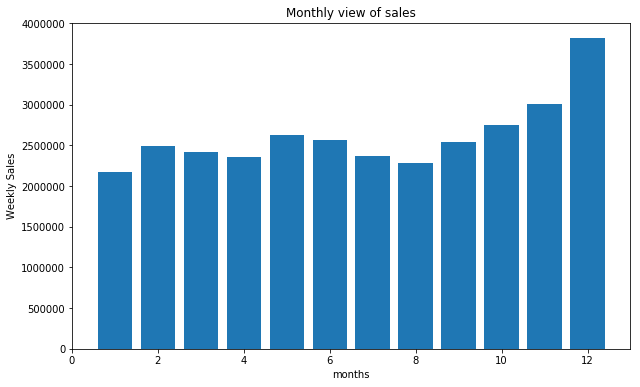

In [24]:
# Monthly view of sales for all years
plt.figure(figsize=(10,6))
plt.bar(data["Month"],data["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales")

<Figure size 720x432 with 0 Axes>

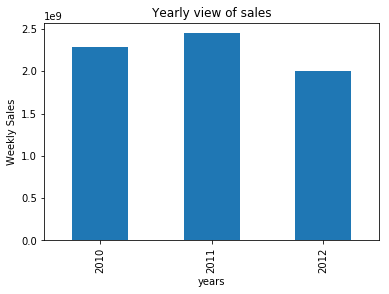

In [22]:
# Yearly view of sales
plt.figure(figsize=(10,6))
data.groupby("Year")[["Weekly_Sales"]].sum().plot(kind='bar',legend=False)
plt.xlabel("years")
plt.ylabel("Weekly Sales")
plt.title("Yearly view of sales");

### Statistical Model

For Store 1 – Build prediction models to forecast demand

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

Change dates into days by creating new variable.

Select the model which gives best accuracy.

In [25]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.57,211.10,8.11,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.55,211.24,8.11,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.62,211.35,8.11,3,5,2010


In [45]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
fit_cpi = ols('Weekly_Sales ~ CPI',data = data).fit()
#anova_mod = sm.stats.anova_lm(fit)
fit_cpi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     34.12
Date:                Mon, 06 Jun 2022   Prob (F-statistic):           5.44e-09
Time:                        03:58:01   Log-Likelihood:                -94335.
No. Observations:                6435   AIC:                         1.887e+05
Df Residuals:                    6433   BIC:                         1.887e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.226e+06   3.14e+04     39.047      0.000    1.16e+06    1.29e+06
CPI        -1041.5580    178.315     -5.841      0.000   -1391.114    -692.002
==============================================================================
Omnibus:                      408.877   Durbin-Watson:                   0.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              490.794
Skew:                           0.676   Prob(JB):                    2.66e-107
Kurtosis:                       3.067   Cond. No.                         787.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
fit_temp = ols('Weekly_Sales ~ Temperature',data = data).fit()
anova_mod = sm.stats.anova_lm(fit_temp)
anova_mod

,df,sum_sq,mean_sq,F,PR(>F)
Temperature,1.00,8344135856863.16,8344135856863.16,26.30,0.00
Residual,6433.00,2040947171567265.50,317262112788.32,nan,nan


In [43]:
fit_fuel_price = ols('Weekly_Sales ~ Fuel_Price',data = data).fit()
anova_mod = sm.stats.anova_lm(fit_fuel_price)
anova_mod

,df,sum_sq,mean_sq,F,PR(>F)
Fuel_Price,1.00,183541192571.05,183541192571.05,0.58,0.45
Residual,6433.00,2049107766231557.50,318530664733.65,nan,nan


p value is less than 0.05 for CPI and temperature, so we reject the null hypothesis that there is no relationship.

pvalue > 0.05 for Fuel price, so we assume this IV to not contributing in sales

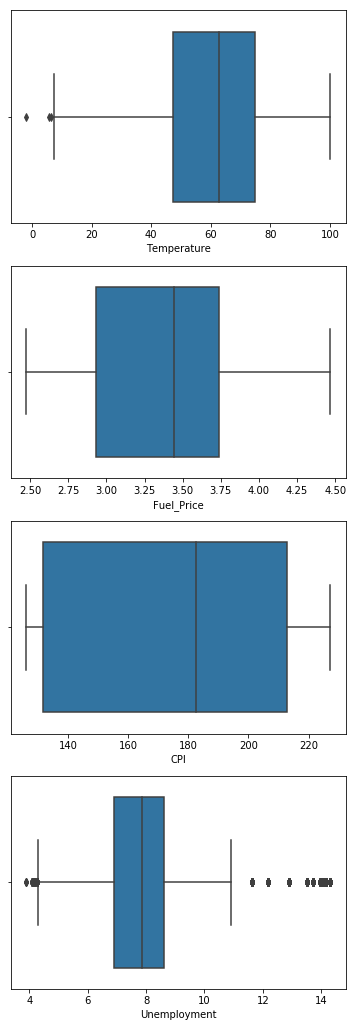

In [26]:
# find outliers
fig, axs = plt.subplots(4,figsize=(6,18))
X = data[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(data[column], ax=axs[i])

In [27]:
# drop the outliers
data_new = data[(data['Unemployment']<10) & (data['Unemployment']>4.5) & (data['Temperature']>10)]
data_new.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.57,211.10,8.11,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.55,211.24,8.11,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.62,211.35,8.11,3,5,2010


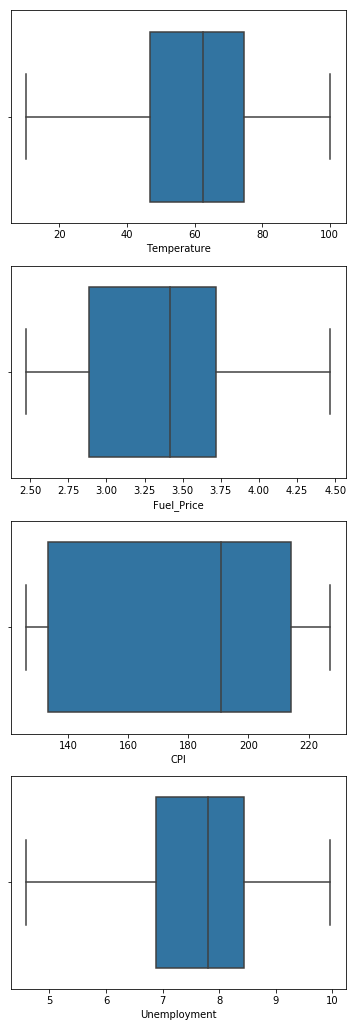

In [29]:
# check outliers
fig, axs = plt.subplots(4,figsize=(6,18))
X = data_new[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(data_new[column], ax=axs[i])

Linear Regression:

Accuracy: 13.218100691843759
Mean Absolute Error: 440395.4855699437
Mean Squared Error: 281513464216.4512
Root Mean Squared Error: 530578.4241904783


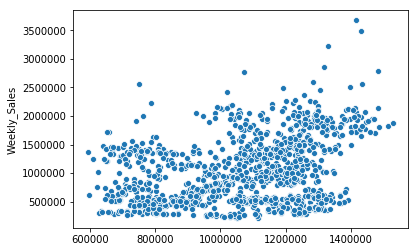

In [31]:
# Import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Select features and target
X = data_new[['Store','Fuel_Price','CPI','Unemployment','Day','Month','Year']]
y = data_new['Weekly_Sales']

# Split data to train and test (0.80:0.20)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Linear Regression model
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, y_train)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
sns.scatterplot(y_pred, y_test);

Random Forest Regressor:

Accuracy: 95.66827924298592
Mean Absolute Error: 64186.165105136424
Mean Squared Error: 13778137700.244818
Root Mean Squared Error: 117380.31223439822


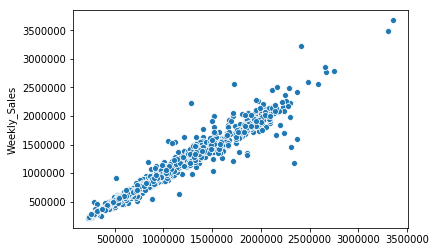

In [32]:
# Random Forest Regressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
sns.scatterplot(y_pred, y_test);